In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
liblinear = LinearSVC()
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
df = pd.read_csv('C:/Users/Samantha/Downloads/heart_cleveland_upload.csv')


In [11]:
df.head(n=297)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

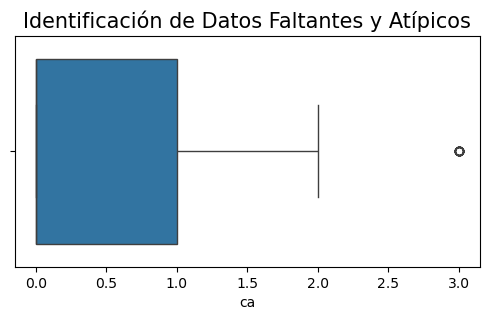

In [15]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["ca"])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=15 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

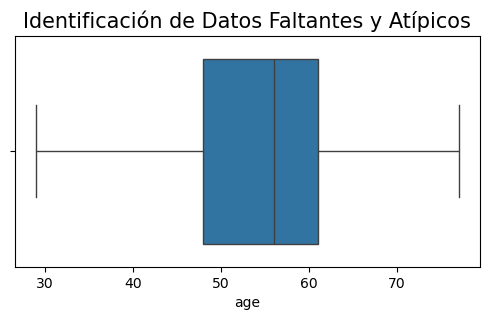

In [17]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["age"])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=15 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

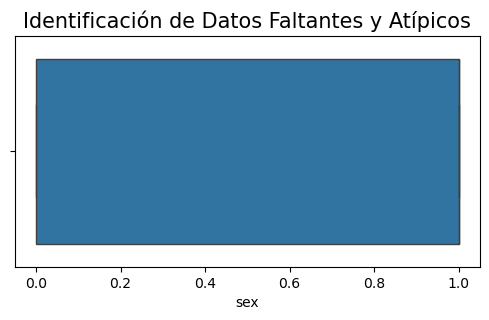

In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["sex"])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=15 )

In [21]:
print("Cantidad de Registros con cero en cp: ",df['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en age: ",df['age'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",df['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en restecg: ",df['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",df['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",df['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",df['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",df['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en thal: ",df['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en condition: ",df['condition'].isin([0]).sum())

Cantidad de Registros con cero en cp:  23
Cantidad de Registros con cero en age:  0
Cantidad de Registros con cero en fbs:  254
Cantidad de Registros con cero en restecg:  147
Cantidad de Registros con cero en exang:  200
Cantidad de Registros con cero en oldpeak:  96
Cantidad de Registros con cero en slope:  139
Cantidad de Registros con cero en ca:  174
Cantidad de Registros con cero en thal:  164
Cantidad de Registros con cero en condition:  160


In [23]:
df['cp']=df['cp'].replace(0,df['cp'].mean())
df['age']=df['age'].replace(0,df['age'].mean())
df['fbs']=df['fbs'].replace(0,df['fbs'].mean())
df['restecg']=df['restecg'].replace(0,df['restecg'].mean())
df['exang']=df['exang'].replace(0,df['exang'].mean())
df['oldpeak']=df['oldpeak'].replace(0,df['oldpeak'].mean())
df['slope']=df['slope'].replace(0,df['slope'].mean())
df['ca']=df['ca'].replace(0,df['ca'].mean())
df['thal']=df['thal'].replace(0,df['thal'].mean())
df['condition']=df['condition'].replace(0,df['condition'].mean())

In [25]:
print("Cantidad de Registros con cero en cp: ",df['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en age: ",df['age'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",df['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en restecg: ",df['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",df['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",df['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",df['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",df['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en thal: ",df['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en condition: ",df['condition'].isin([0]).sum())

Cantidad de Registros con cero en cp:  0
Cantidad de Registros con cero en age:  0
Cantidad de Registros con cero en fbs:  0
Cantidad de Registros con cero en restecg:  0
Cantidad de Registros con cero en exang:  0
Cantidad de Registros con cero en oldpeak:  0
Cantidad de Registros con cero en slope:  0
Cantidad de Registros con cero en ca:  0
Cantidad de Registros con cero en thal:  0
Cantidad de Registros con cero en condition:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

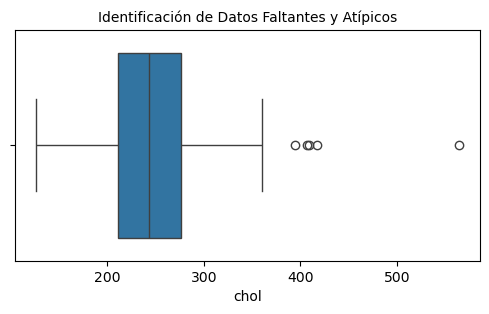

In [27]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["chol"])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

nivel_minimo=150
nivel_maximo=500
Total_Atipicos=((df['chol']<nivel_minimo)|(df['chol']>nivel_maximo)).sum()
print("El total de los datos atípicos es{}".format(Total_Atipicos))

In [30]:
nivel_minimo=150 
nivel_maximo=500 
Total_Atipicos=((df['chol']<nivel_minimo)|(df['chol']>nivel_maximo)).sum() 
print("El total de los datos atípicos es {}".format(Total_Atipicos))

El total de los datos atípicos es 6


In [32]:
df=df[(df['chol']<nivel_maximo)&(df['chol']>nivel_minimo)]

In [34]:
Total_Atipicos=((df['chol']<nivel_minimo)|(df['chol']>nivel_maximo)).sum()
print("El total de los datos atípicos es {}".format(Total_Atipicos))

El total de los datos atípicos es 0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        291 non-null    int64  
 1   sex        291 non-null    int64  
 2   cp         291 non-null    float64
 3   trestbps   291 non-null    int64  
 4   chol       291 non-null    int64  
 5   fbs        291 non-null    float64
 6   restecg    291 non-null    float64
 7   thalach    291 non-null    int64  
 8   exang      291 non-null    float64
 9   oldpeak    291 non-null    float64
 10  slope      291 non-null    float64
 11  ca         291 non-null    float64
 12  thal       291 non-null    float64
 13  condition  291 non-null    float64
dtypes: float64(9), int64(5)
memory usage: 34.1 KB


In [38]:
df['condition'].value_counts()

condition
0.461279    156
1.000000    135
Name: count, dtype: int64

In [40]:
df[['condition']].head(10)

,condition
0,0.461279
1,0.461279
2,0.461279
3,1.000000
4,0.461279
5,0.461279
6,0.461279
7,1.000000
8,0.461279
9,0.461279


In [42]:
X = df.drop('condition', axis=1)
Y = df['condition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [44]:
print (X_train)

     age  sex        cp  trestbps  chol       fbs   restecg  thalach  \
52    48    1  1.000000       110   229  0.144781  0.996633      168   
275   45    1  3.000000       104   208  0.144781  2.000000      148   
66    41    1  1.000000       110   235  0.144781  0.996633      153   
292   40    1  3.000000       152   223  0.144781  0.996633      181   
5     64    1  2.158249       170   227  0.144781  2.000000      155   
..   ...  ...       ...       ...   ...       ...       ...      ...   
143   43    1  2.000000       130   315  0.144781  0.996633      162   
245   54    1  3.000000       120   188  0.144781  0.996633      113   
288   42    1  3.000000       136   315  0.144781  0.996633      125   
264   50    1  3.000000       144   200  0.144781  2.000000      126   
233   57    1  3.000000       132   207  0.144781  0.996633      168   

        exang   oldpeak     slope        ca      thal  
52   0.326599  1.000000  2.000000  0.676768  2.000000  
275  1.000000  3.000000

In [46]:
model_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)
Prediccion = modelo_regresion.predict(X_test)

In [48]:
print (Y_test)

110    0.461279
184    1.000000
30     0.461279
276    0.461279
112    0.461279
         ...   
104    0.461279
269    1.000000
90     0.461279
246    1.000000
76     1.000000
Name: condition, Length: 73, dtype: float64


In [50]:
print (Prediccion)

[0.41431967 1.09737638 0.55909087 0.64020923 0.49053011 0.98145395
 0.96889111 0.75329609 0.6185942  1.16503274 0.4555681  0.55064149
 0.75815672 0.8234895  0.4303622  0.66270883 0.95486978 0.94167279
 0.9145481  0.58338454 0.52159015 0.85941728 0.87580652 0.45127028
 0.8001331  0.78567024 0.42989145 0.90149969 0.83887295 0.80972198
 0.52960904 0.56220965 0.63572621 0.5985955  0.65364547 0.77967328
 0.43954895 0.42639191 0.91257048 0.91754617 0.40346509 0.63234224
 0.48493646 0.86041952 1.18240284 0.50216101 0.60551019 0.60167814
 0.50435986 0.75830654 0.55996319 0.40452937 1.1013347  1.01252074
 0.50118308 0.73098174 0.54836678 0.56176882 0.97064544 0.77241877
 0.50361008 0.59366515 0.68324627 0.9466095  0.37271364 0.76790328
 0.54341042 0.4961659  0.52727533 0.9634997  0.98680081 0.95784684
 0.852864  ]


Precisión: 0.88
Recall: 0.86
F1 Score: 0.87
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



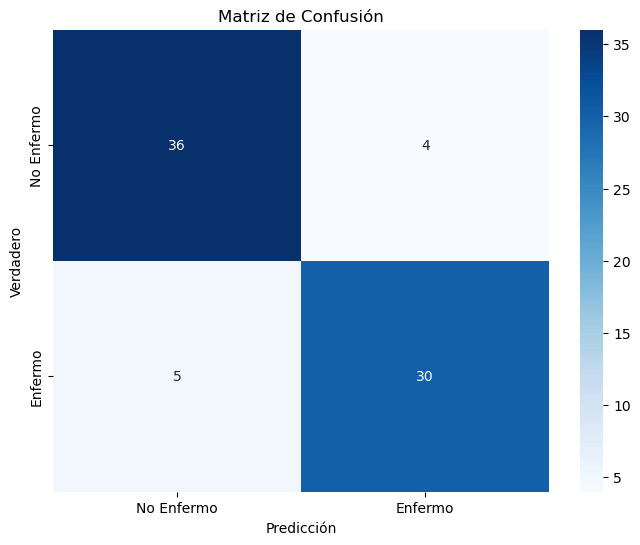

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cargar datos
df = pd.read_csv('C:/Users/Samantha/Downloads/heart_cleveland_upload.csv')

# Preprocesamiento (añade aquí tu código de limpieza y tratamiento de datos)

# Definir características y variable objetivo
X = df.drop('condition', axis=1)
Y = df['condition']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

# Entrenar el modelo
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train)

# Realizar predicciones
Prediccion = modelo_regresion.predict(X_test)

# Evaluar el desempeño del modelo
precision = precision_score(Y_test, Prediccion)
recall = recall_score(Y_test, Prediccion)
f1 = f1_score(Y_test, Prediccion)
accuracy = accuracy_score(Y_test, Prediccion)

print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')

# Informe de clasificación
report = classification_report(Y_test, Prediccion)
print(report)

# Matriz de confusión
confusion = confusion_matrix(Y_test, Prediccion)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermo', 'Enfermo'], yticklabels=['No Enfermo', 'Enfermo'])
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

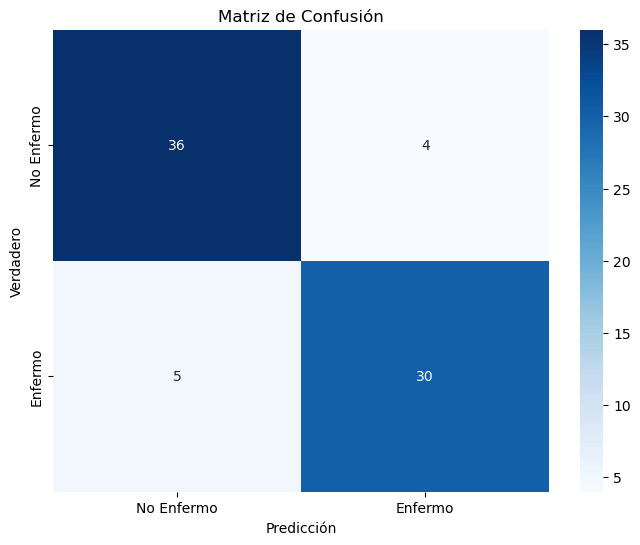

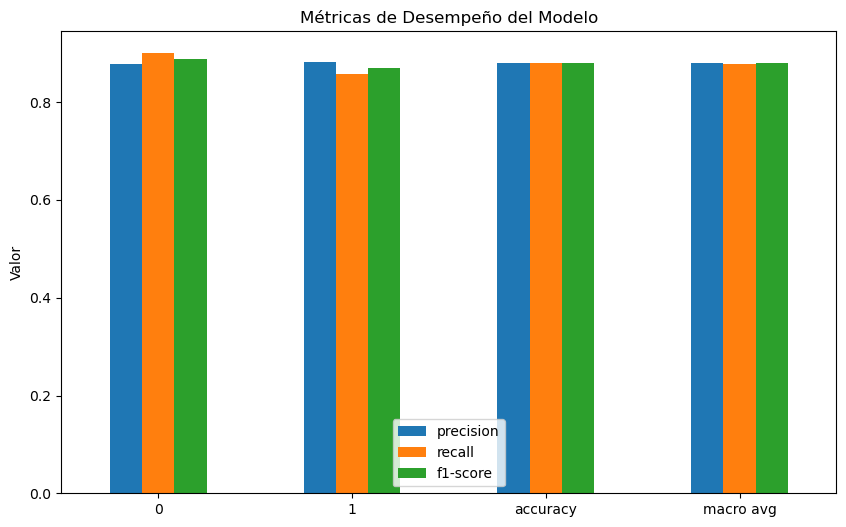

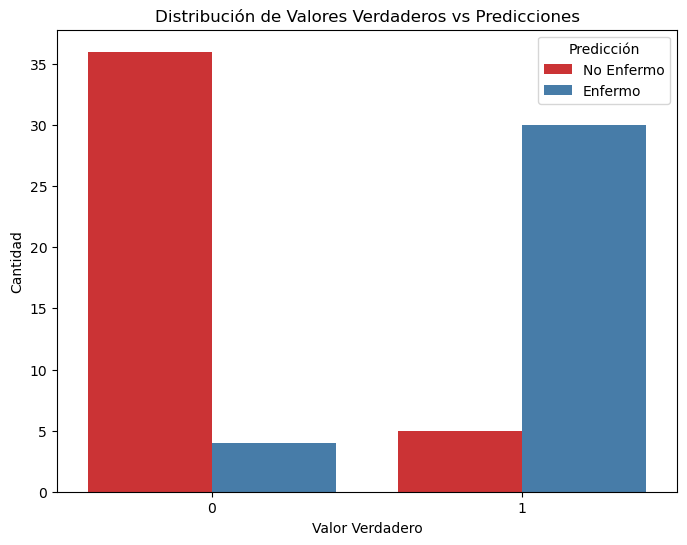

C:\Users\Samantha\AppData\Local\Temp\ipykernel_7844\3940707474.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coeficientes', y='Características', palette='viridis')


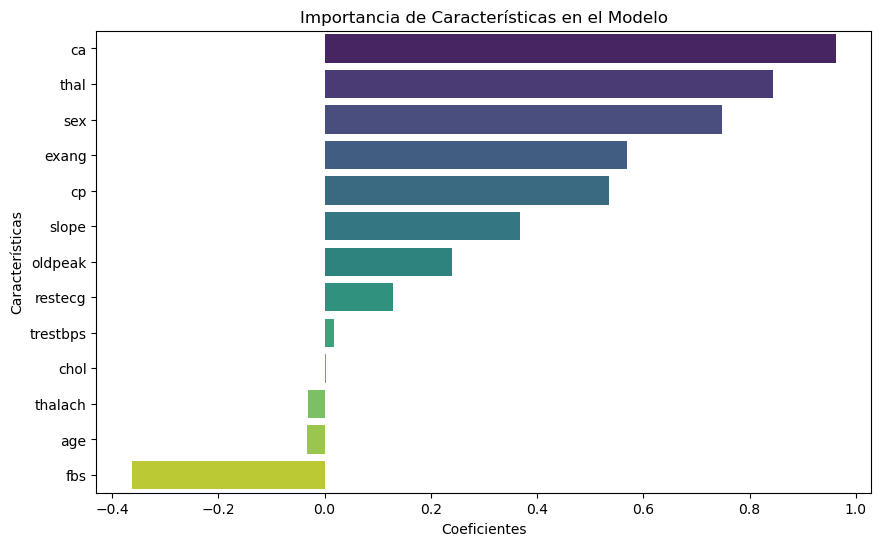

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cargar datos y preprocesar (asegúrate de incluir tus pasos aquí)

# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

# Entrenar el modelo
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train)

# Realizar predicciones
Prediccion = modelo_regresion.predict(X_test)

# 1. Matriz de Confusión
confusion = confusion_matrix(Y_test, Prediccion)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermo', 'Enfermo'], yticklabels=['No Enfermo', 'Enfermo'])
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

# 2. Gráfico de Métricas de Desempeño
report = classification_report(Y_test, Prediccion, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10, 6))
plt.title('Métricas de Desempeño del Modelo')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.show()

# 3. Distribución de Valores Verdaderos vs Predicciones
comparison_df = pd.DataFrame({'Verdadero': Y_test, 'Predicción': Prediccion})
plt.figure(figsize=(8, 6))
sns.countplot(data=comparison_df, x='Verdadero', hue='Predicción', palette='Set1')
plt.title('Distribución de Valores Verdaderos vs Predicciones')
plt.xlabel('Valor Verdadero')
plt.ylabel('Cantidad')
plt.legend(title='Predicción', loc='upper right', labels=['No Enfermo', 'Enfermo'])
plt.show()

# 4. Importancia de Características
coef = modelo_regresion.coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Características': features, 'Coeficientes': coef})
coef_df = coef_df.sort_values(by='Coeficientes', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coeficientes', y='Características', palette='viridis')
plt.title('Importancia de Características en el Modelo')
plt.xlabel('Coeficientes')
plt.ylabel('Características')
plt.show()